Found 2155 files belonging to 4 classes.
Using 1724 files for training.
Class Names:  ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
Actual label: Potato___healthy, Predicted: Potato___Early_blight, Confidence: 0.7264806628227234


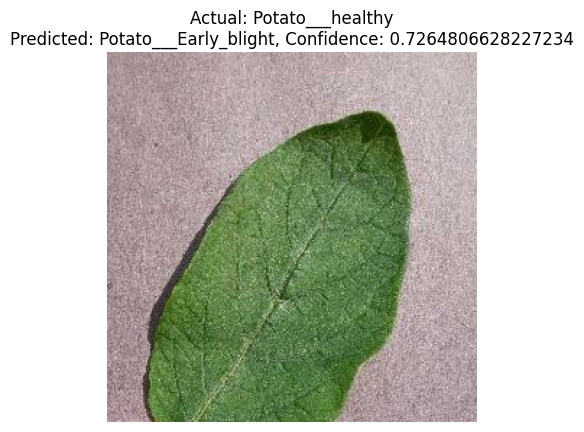

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Actual label: Potato___Early_blight, Predicted: Potato___Early_blight, Confidence: 0.7290450930595398


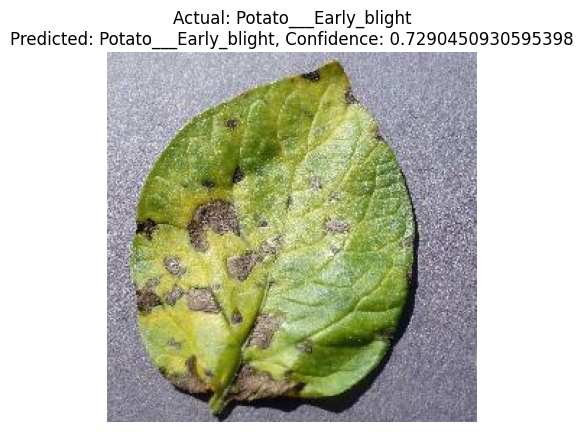

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Actual label: Potato___healthy, Predicted: Potato___Early_blight, Confidence: 0.7253539562225342


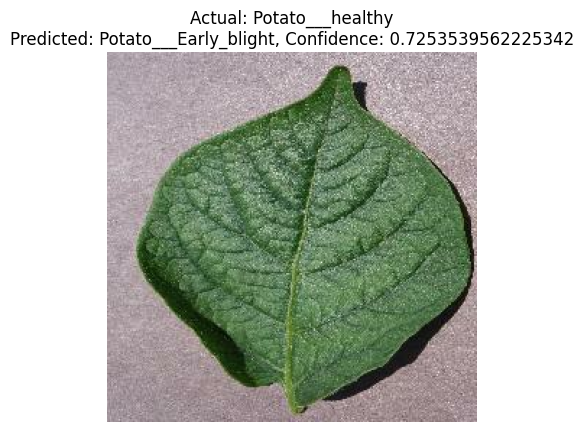

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Actual label: Potato___Early_blight, Predicted: Potato___Early_blight, Confidence: 0.7271631956100464


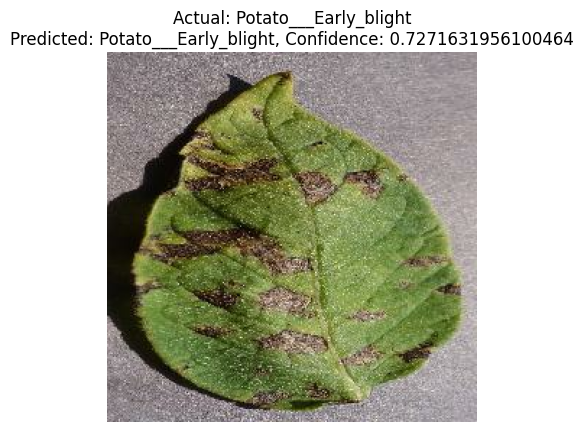

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Actual label: Potato___Late_blight, Predicted: Potato___Early_blight, Confidence: 0.7257193326950073


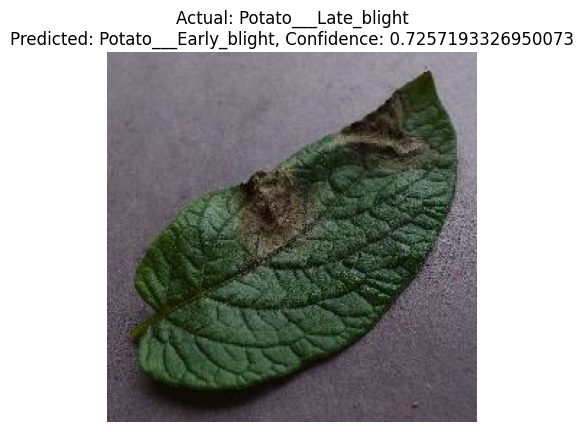

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

BATCH_SIZE = 32
IMAGE_SIZE = 256

# Load the dataset excluding the 'npmodels' directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    # Specify valid class names if needed to exclude directories like 'npmodels'
    validation_split=0.2,
    subset='training'
)
class_names = [class_name for class_name in dataset.class_names if class_name != 'npmodels']
print("Class Names: ", class_names)

# Load the model
model = tf.keras.models.load_model(r"C:\Datasets\PlantVillage\npmodels\3.h5")

# Ensure the model's compiled state
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Take a batch from the dataset
for images, labels in dataset.take(1):
    for i in range(5):  # Check first 5 images in the batch
        img = images[i].numpy().astype("uint8")
        actual_label = class_names[labels[i]]

        # Preprocess the image similarly
        img_resized = tf.image.resize(img, (IMAGE_SIZE, IMAGE_SIZE)) / 255.0
        img_batch = np.expand_dims(img_resized, 0)

        # Predict using the model
        prediction = model.predict(img_batch)
        predicted_class = class_names[np.argmax(prediction[0])]
        confidence = np.max(prediction[0])

        print(f"Actual label: {actual_label}, Predicted: {predicted_class}, Confidence: {confidence}")
        
        plt.imshow(img)
        plt.title(f"Actual: {actual_label}\nPredicted: {predicted_class}, Confidence: {confidence}")
        plt.axis("off")
        plt.show()
